In [2]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab
from scipy.stats import norm

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

import math
data = np.loadtxt("Data.txt", delimiter="	  ")

## Firstly, estimate the parameters of this multivariate normal using the maximum likelihood principle.

In [3]:
def normalLoglikelihood(data):
    mean = np.mean(data)
    soma = np.sum(np.power(data-mean,2))
    var = (1/len(data))*soma
    return mean, var

In [4]:
mean = np.mean(data, axis=0)
mean

array([ 0.77291471,  0.92087682,  0.12619353,  0.9091646 ,  0.66148213])

In [5]:
cov = np.cov(data.T)
print(cov)
#x = np.vstack([data[:,0],data[:,2]])
#np.cov(x)

[[ 1.04306317  0.80588233  1.16113565  1.35940949  0.90060135]
 [ 0.80588233  1.72203546  1.73666803  1.54732501  1.55312727]
 [ 1.16113565  1.73666803  2.87426042  2.70179449  2.75686331]
 [ 1.35940949  1.54732501  2.70179449  2.99116633  2.73713501]
 [ 0.90060135  1.55312727  2.75686331  2.73713501  2.90998099]]


## Plotting parameters for $X_1$ to $X_5$ (mean and variance)

In [9]:
def plotGaussianPDF(mean, var):
    std = np.sqrt(var)
    x = np.arange(mean - 10*std, mean + 10*std, 0.1)
    #fx = (1/(np.sqrt(2*np.pi*std)))*np.exp(-(1/2)*(x-mean)/std)
    fx = mlab.normpdf(x, mean, var)
    plt.plot(x, fx)
    plt.show()

## 2.1) Find $X_2$ and $X_2 |X_{1,3,4,5} = (x_1 , x_3 , x_4 , x_5 )'$

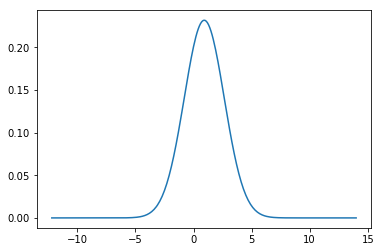

In [11]:
meandX2 = mean[1]
varX2 = cov[1,1]
plotGaussianPDF(meandX2,varX2)

### The corollary 2.1 shows that any marginal distribution of X is also normal Mean and covariance matrix are those from the partial vector. Using corollary 2.1 we have $X_2|X_{1,3,4,5}$ has a $N(\mu_2,\Sigma_2)$ distribution. Thus, it is the same of $X_2$.

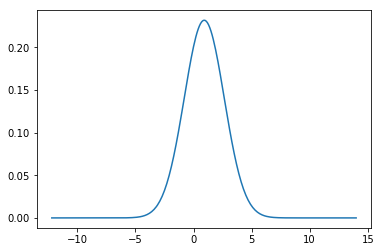

In [10]:
plotGaussianPDF(mean[1],cov[1,1])

## 2.1) Find $X_{1,4}$ and $X_{1,4} |X_{2,3,5} = (x_2 , x_3 , x_5 )'$

In [27]:
X = data[:,[0,3]]
X

array([[-0.36550706, -1.4570533 ],
       [-0.28504674, -1.7013038 ],
       [-0.0181768 ,  0.69637051],
       ..., 
       [ 1.3143012 ,  0.73321527],
       [ 1.8704013 ,  1.4629421 ],
       [ 1.7106215 ,  2.6302987 ]])

In [28]:
cov2 = np.cov(X.T)
print(cov2)

[[ 1.04306317  1.35940949]
 [ 1.35940949  2.99116633]]
